In [1]:
import pandas as pd 
df = pd.read_csv("Behavioral_Risk_2011_clean.csv")
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df.columns

Index(['YEAR', 'LocationAbbr', 'LocationDesc', 'TopicType', 'TopicDesc',
       'MeasureDesc', 'DataSource', 'Response', 'Data_Value_Unit',
       'Data_Value_Type', 'Data_Value', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Data_Value_Std_Err', 'Low_Confidence_Limit',
       'High_Confidence_Limit', 'Sample_Size', 'Gender', 'Race', 'Age',
       'Education', 'GeoLocation'],
      dtype='object')

In [3]:
pd.DataFrame(df.Race.value_counts())


,Race
All Races,29260
White,971
Hispanic,961
African American,777
Asian/Pacific Islander,685
American Indian/Alaska Native,672


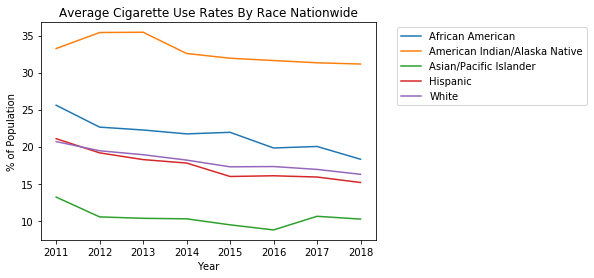

In [4]:
df[(df.Race != "All Races") & (df.TopicDesc == "Cigarette Use (Adults)")].groupby(["YEAR", "Race"]).Data_Value.mean().reset_index().pivot(index="YEAR", columns="Race", values="Data_Value").plot(title="Average Cigarette Use Rates By Race Nationwide")
plt.xlabel("% of Population")
plt.legend(loc=0)
plt.ylabel("% of Population")
plt.xlabel("Year")
plt.legend(bbox_to_anchor=(1.05, 1));

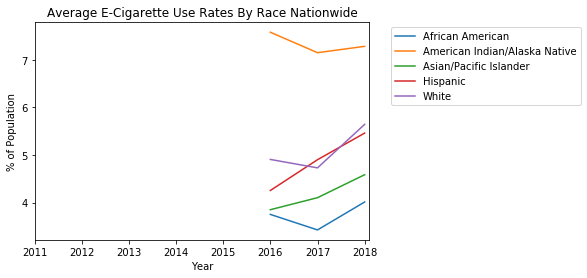

In [5]:
df[(df.Race != "All Races") & (df.TopicDesc == "E-Cigarette Use (Adults)")].groupby(["YEAR", "Race"]).Data_Value.mean().reset_index().pivot(index="YEAR", columns="Race", values="Data_Value").plot(title="Average E-Cigarette Use Rates By Race Nationwide")
plt.xticks(range(2011, 2019))
plt.xlabel("% of Population")
plt.legend(loc=0)
plt.ylabel("% of Population")
plt.xlabel("Year")
plt.legend(bbox_to_anchor=(1.05, 1));

In [6]:
top_state_by_year_by_race = df[df.Race != "All Races"].groupby(["YEAR", "Race", "LocationAbbr"]).Data_Value.mean().reset_index().sort_values("Data_Value", ascending=False).groupby(["YEAR", "Race"]).first()
top_state_by_year_by_race.rename(columns={"LocationAbbr":"State", "Data_Value" : "Smoking Rate %"}, inplace=True)
top_state_by_year_by_race.columns.name = "States With Highest Smoking Rate By Race"
top_state_by_year_by_race



States With Highest Smoking Rate By Race State  Smoking Rate %
YEAR Race                                                     
2011 African American                       WI       20.350000
     American Indian/Alaska Native          ND       52.000000
     Asian/Pacific Islander                 GU       24.550000
     Hispanic                               WV       22.850000
     White                                  MS       18.550000
2012 African American                       AR       19.750000
     American Indian/Alaska Native          SD       55.200000
     Asian/Pacific Islander                 GU       23.000000
     Hispanic                               SD       20.750000
     White                                  WV       18.250000
2013 African American                       WI       17.200000
     American Indian/Alaska Native          PA       47.400000
     Asian/Pacific Islander                 GU       17.200000
     Hispanic                               GU       23.600000
     White                                  WV       18.250000
2014 African American                       WI       18.350000
     American Indian/Alaska Native          MI       34.450000
     Asian/Pacific Islander                 GU       18.250000
     Hispanic                               ND       26.800000
     White                                  WV       17.700000
2015 African American                       NM       19.550000
     American Indian/Alaska Native          TN       32.700000
     Asian/Pacific Islander                 GU       17.200000
     Hispanic                               GU       22.250000
     White                                  WV       17.400000
2016 African American                       NM       13.433333
     American Indian/Alaska Native          MO       26.433333
     Asian/Pacific Islander                 GU       13.466667
     Hispanic                               ND       16.600000
     White                                  AR       13.266667
2017 African American                       WV       15.766667
     American Indian/Alaska Native          OH       30.100000
     Asian/Pacific Islander                 GU       14.033333
     Hispanic                               LA       15.900000
     White                                  WV       13.366667
2018 African American                       WV       14.900000
     American Indian/Alaska Native          VT       30.100000
     Asian/Pacific Islander                 GU       13.033333
     Hispanic                               ME       16.900000
     White                                  WV       16.750000

In [7]:
lowest_state_by_year_by_race = df[df.Race != "All Races"].groupby(["YEAR", "Race", "LocationAbbr"]).Data_Value.mean().reset_index().sort_values("Data_Value").groupby(["YEAR", "Race"]).first()
lowest_state_by_year_by_race.rename(columns={"LocationAbbr":"State", "Data_Value" : "Smoking Rate %"})
lowest_state_by_year_by_race.columns.name = "States With Lowest Smoking Rate By Race"
lowest_state_by_year_by_race

States With Lowest Smoking Rate By Race LocationAbbr  Data_Value
YEAR Race                                                       
2011 African American                             MA    9.000000
     American Indian/Alaska Native                DE    0.000000
     Asian/Pacific Islander                       KY    0.200000
     Hispanic                                     GA    6.550000
     White                                        PR    3.850000
2012 African American                             UT    7.000000
     American Indian/Alaska Native                DE    0.000000
     Asian/Pacific Islander                       DE    0.600000
     Hispanic                                     RI    5.800000
     White                                        DC    6.150000
2013 African American                             WA    8.250000
     American Indian/Alaska Native                NM    9.850000
     Asian/Pacific Islander                       SC    2.050000
     Hispanic                                     VT    3.450000
     White                                        DC    5.500000
2014 African American                             AK    6.500000
     American Indian/Alaska Native                AZ    9.100000
     Asian/Pacific Islander                       DE    1.600000
     Hispanic                                     MD    4.600000
     White                                        DC    4.250000
2015 African American                             CA    7.850000
     American Indian/Alaska Native                NJ    4.000000
     Asian/Pacific Islander                       DC    1.700000
     Hispanic                                     NH    3.800000
     White                                        DC    3.950000
2016 African American                             HI    5.333333
     American Indian/Alaska Native                CA    6.533333
     Asian/Pacific Islander                       NJ    2.366667
     Hispanic                                     PR    4.133333
     White                                        DC    4.433333
2017 African American                             HI    5.600000
     American Indian/Alaska Native                CT    2.000000
     Asian/Pacific Islander                       WI    2.866667
     Hispanic                                     AR    2.800000
     White                                        DC    3.366667
2018 African American                             RI    3.833333
     American Indian/Alaska Native                MD    7.466667
     Asian/Pacific Islander                       DE    1.933333
     Hispanic                                     MD    3.900000
     White                                        DC    4.200000

In [8]:
pd.set_option('display.max_rows',(900))

In [9]:
### for plotting race by smoking type lowest rates

lowest_state_by_year_by_race = df[df.Race != "All Races"].groupby(["YEAR", "Race", "LocationAbbr", "TopicDesc"]).Data_Value.mean().reset_index().sort_values("Data_Value").groupby(["YEAR", "Race", "TopicDesc"]).first()

lowest_state_by_year_by_race.rename(columns={"LocationAbbr":"State", "Data_Value" : "Smoking Rate %"})
lowest_state_by_year_by_race.columns.name = "States With Lowest Smoking Rate By Race"
lowest_state_by_year_by_race


States With Lowest Smoking Rate By Race                           LocationAbbr  \
YEAR Race                          TopicDesc                                     
2011 African American              Cigarette Use (Adults)                   FL   
                                   Smokeless Tobacco Use (Adults)           RI   
     American Indian/Alaska Native Cigarette Use (Adults)                   ID   
                                   Smokeless Tobacco Use (Adults)           FL   
     Asian/Pacific Islander        Cigarette Use (Adults)                   OR   
                                   Smokeless Tobacco Use (Adults)           SC   
     Hispanic                      Cigarette Use (Adults)                   CA   
                                   Smokeless Tobacco Use (Adults)           GA   
     White                         Cigarette Use (Adults)                   PR   
                                   Smokeless Tobacco Use (Adults)           PR   
2012 African American              Cigarette Use (Adults)                   UT   
                                   Smokeless Tobacco Use (Adults)           AK   
     American Indian/Alaska Native Cigarette Use (Adults)                   GU   
                                   Smokeless Tobacco Use (Adults)           OR   
     Asian/Pacific Islander        Cigarette Use (Adults)                   DE   
                                   Smokeless Tobacco Use (Adults)           RI   
     Hispanic                      Cigarette Use (Adults)                   MD   
                                   Smokeless Tobacco Use (Adults)           AK   
     White                         Cigarette Use (Adults)                   UT   
                                   Smokeless Tobacco Use (Adults)           RI   
2013 African American              Cigarette Use (Adults)                   WA   
                                   Smokeless Tobacco Use (Adults)           AK   
     American Indian/Alaska Native Cigarette Use (Adults)                   NM   
                                   Smokeless Tobacco Use (Adults)           NY   
     Asian/Pacific Islander        Cigarette Use (Adults)                   NC   
                                   Smokeless Tobacco Use (Adults)           NM   
     Hispanic                      Cigarette Use (Adults)                   VT   
                                   Smokeless Tobacco Use (Adults)           WI   
     White                         Cigarette Use (Adults)                   DC   
                                   Smokeless Tobacco Use (Adults)           DC   
2014 African American              Cigarette Use (Adults)                   AK   
                                   Smokeless Tobacco Use (Adults)           AK   
     American Indian/Alaska Native Cigarette Use (Adults)                   NM   
                                   Smokeless Tobacco Use (Adults)           MA   
     Asian/Pacific Islander        Cigarette Use (Adults)                   NM   
                                   Smokeless Tobacco Use (Adults)           RI   
     Hispanic                      Cigarette Use (Adults)                   MD   
                                   Smokeless Tobacco Use (Adults)           AR   
     White                         Cigarette Use (Adults)                   DC   
                                   Smokeless Tobacco Use (Adults)           HI   
2015 African American              Cigarette Use (Adults)                   FL   
                                   Smokeless Tobacco Use (Adults)           OR   
     American Indian/Alaska Native Cigarette Use (Adults)                   NJ   
                                   Smokeless Tobacco Use (Adults)           MD   
     Asian/Pacific Islander        Cigarette Use (Adults)                   OK   
                                   Smokeless Tobacco Use (Adults)           OK   
     Hispanic                      Cigarette Use (Adults)       

Text(0.5, 1.0, 'Nationwide Tobcco use By African Americans')

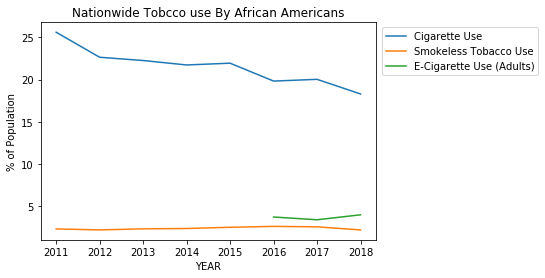

In [11]:
average_by_race = df[df.Race != "All Races"].groupby(["YEAR", "Race", "TopicDesc"]).Data_Value.mean().reset_index().sort_values("Data_Value", ascending=False).groupby(["YEAR", "Race","TopicDesc"]).first()
average_by_race = average_by_race.reset_index(level=[1,2])


fig, ax = plt.subplots(nrows=1, ncols=1)
average_by_race[(average_by_race.Race=="African American") & (average_by_race.TopicDesc == "Cigarette Use (Adults)")].plot(ax=ax)
average_by_race[(average_by_race.Race=="African American") & (average_by_race.TopicDesc == "Smokeless Tobacco Use (Adults)")].plot(ax=ax)
average_by_race[(average_by_race.Race=="African American") & (average_by_race.TopicDesc == "E-Cigarette Use (Adults)")].plot(ax=ax)
ax.legend(["Cigarette Use", "Smokeless Tobacco Use", "E-Cigarette Use (Adults)"], bbox_to_anchor=(1.5, 1))
plt.ylabel("% of Population")
ax.set_title("Nationwide Tobcco use By African Americans")

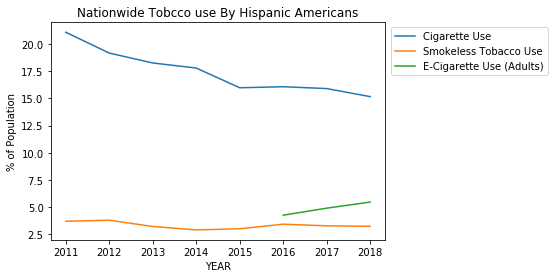

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=1)
average_by_race[(average_by_race.Race=="Hispanic") & (average_by_race.TopicDesc == "Cigarette Use (Adults)")].plot(ax=ax)
average_by_race[(average_by_race.Race=="Hispanic") & (average_by_race.TopicDesc == "Smokeless Tobacco Use (Adults)")].plot(ax=ax)
average_by_race[(average_by_race.Race=="Hispanic") & (average_by_race.TopicDesc == "E-Cigarette Use (Adults)")].plot(ax=ax)
ax.legend(["Cigarette Use", "Smokeless Tobacco Use", "E-Cigarette Use (Adults)"], bbox_to_anchor=(1.5, 1))
plt.ylabel("% of Population")
ax.set_title("Nationwide Tobcco use By Hispanic Americans");

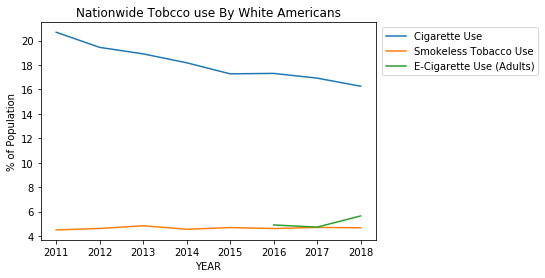

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=1)
average_by_race[(average_by_race.Race=="White") & (average_by_race.TopicDesc == "Cigarette Use (Adults)")].plot(ax=ax)
average_by_race[(average_by_race.Race=="White") & (average_by_race.TopicDesc == "Smokeless Tobacco Use (Adults)")].plot(ax=ax)
average_by_race[(average_by_race.Race=="White") & (average_by_race.TopicDesc == "E-Cigarette Use (Adults)")].plot(ax=ax)
ax.legend(["Cigarette Use", "Smokeless Tobacco Use", "E-Cigarette Use (Adults)"], bbox_to_anchor=(1.5, 1))
plt.ylabel("% of Population")
ax.set_title("Nationwide Tobcco use By White Americans");

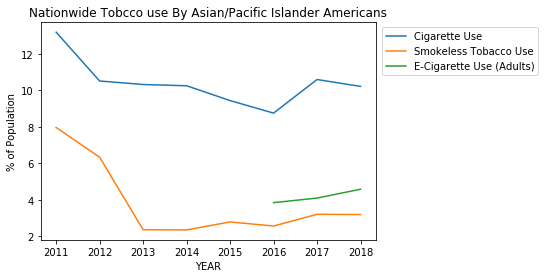

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=1)
average_by_race[(average_by_race.Race=="Asian/Pacific Islander") & (average_by_race.TopicDesc == "Cigarette Use (Adults)")].plot(ax=ax)
average_by_race[(average_by_race.Race=="Asian/Pacific Islander") & (average_by_race.TopicDesc == "Smokeless Tobacco Use (Adults)")].plot(ax=ax)
average_by_race[(average_by_race.Race=="Asian/Pacific Islander") & (average_by_race.TopicDesc == "E-Cigarette Use (Adults)")].plot(ax=ax)
ax.legend(["Cigarette Use", "Smokeless Tobacco Use", "E-Cigarette Use (Adults)"], bbox_to_anchor=(1.5, 1))
plt.ylabel("% of Population")
ax.set_title("Nationwide Tobcco use By Asian/Pacific Islander Americans");

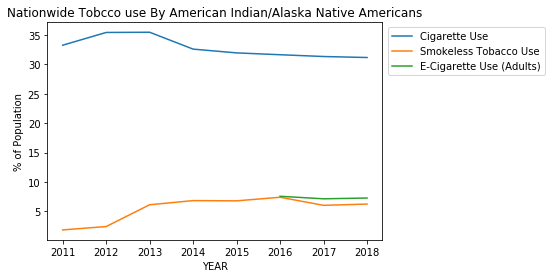

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=1)
average_by_race[(average_by_race.Race=="American Indian/Alaska Native") & (average_by_race.TopicDesc == "Cigarette Use (Adults)")].plot(ax=ax)
average_by_race[(average_by_race.Race=="American Indian/Alaska Native") & (average_by_race.TopicDesc == "Smokeless Tobacco Use (Adults)")].plot(ax=ax)
average_by_race[(average_by_race.Race=="American Indian/Alaska Native") & (average_by_race.TopicDesc == "E-Cigarette Use (Adults)")].plot(ax=ax)
ax.legend(["Cigarette Use", "Smokeless Tobacco Use", "E-Cigarette Use (Adults)"], bbox_to_anchor=(1.5, 1))
plt.ylabel("% of Population")
ax.set_title("Nationwide Tobcco use By American Indian/Alaska Native Americans");

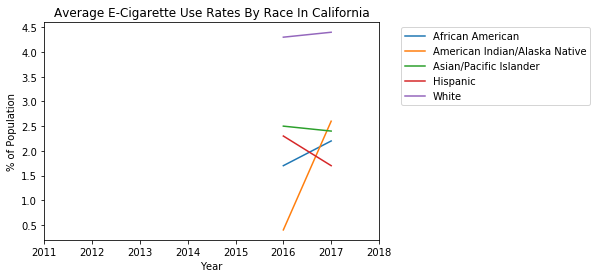

In [18]:
df[(df.Race != "All Races") & (df.TopicDesc == "E-Cigarette Use (Adults)") & (df.LocationDesc == "California")].groupby(["YEAR", "Race"]).Data_Value.mean().reset_index().pivot(index="YEAR", columns="Race", values="Data_Value").plot(title="Average E-Cigarette Use Rates By Race In California")
plt.xticks(range(2011, 2019))
plt.xlabel("% of Population")
plt.legend(loc=0)
plt.ylabel("% of Population")
plt.xlabel("Year")
plt.legend(bbox_to_anchor=(1.05, 1));

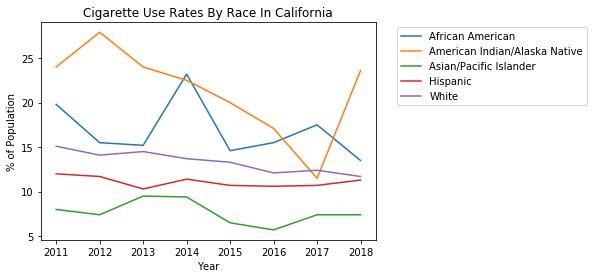

In [33]:
df[(df.Race != "All Races") & (df.TopicDesc == "Cigarette Use (Adults)") & (df.LocationDesc == "California")].groupby(["YEAR", "Race"]).Data_Value.mean().reset_index().pivot(index="YEAR", columns="Race", values="Data_Value").plot(title="Cigarette Use Rates By Race In California")
plt.xticks(range(2011, 2019))
plt.xlabel("% of Population")
plt.legend(loc=0)
plt.ylabel("% of Population")
plt.xlabel("Year")
plt.legend(bbox_to_anchor=(1.05, 1));

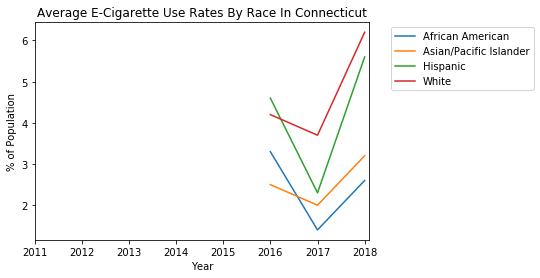

In [19]:
df[(df.Race != "All Races") & (df.TopicDesc == "E-Cigarette Use (Adults)") & (df.LocationDesc == "Connecticut")].groupby(["YEAR", "Race"]).Data_Value.mean().reset_index().pivot(index="YEAR", columns="Race", values="Data_Value").plot(title="Average E-Cigarette Use Rates By Race In Connecticut")
plt.xticks(range(2011, 2019))
plt.xlabel("% of Population")
plt.legend(loc=0)
plt.ylabel("% of Population")
plt.xlabel("Year")
plt.legend(bbox_to_anchor=(1.05, 1));

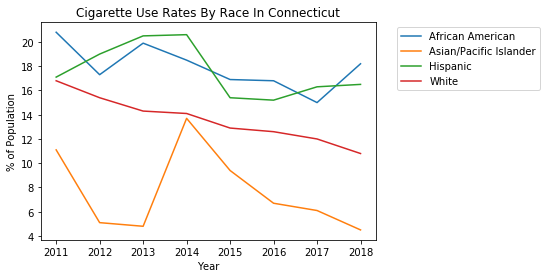

In [34]:
df[(df.Race != "All Races") & (df.TopicDesc == "Cigarette Use (Adults)") & (df.LocationDesc == "Connecticut")].groupby(["YEAR", "Race"]).Data_Value.mean().reset_index().pivot(index="YEAR", columns="Race", values="Data_Value").plot(title="Cigarette Use Rates By Race In Connecticut")
plt.xticks(range(2011, 2019))
plt.xlabel("% of Population")
plt.legend(loc=0)
plt.ylabel("% of Population")
plt.xlabel("Year")
plt.legend(bbox_to_anchor=(1.05, 1));

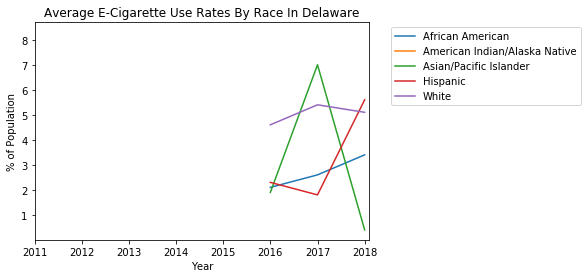

In [20]:
df[(df.Race != "All Races") & (df.TopicDesc == "E-Cigarette Use (Adults)") & (df.LocationDesc == "Delaware")].groupby(["YEAR", "Race"]).Data_Value.mean().reset_index().pivot(index="YEAR", columns="Race", values="Data_Value").plot(title="Average E-Cigarette Use Rates By Race In Delaware")
plt.xticks(range(2011, 2019))
plt.xlabel("% of Population")
plt.legend(loc=0)
plt.ylabel("% of Population")
plt.xlabel("Year")
plt.legend(bbox_to_anchor=(1.05, 1));

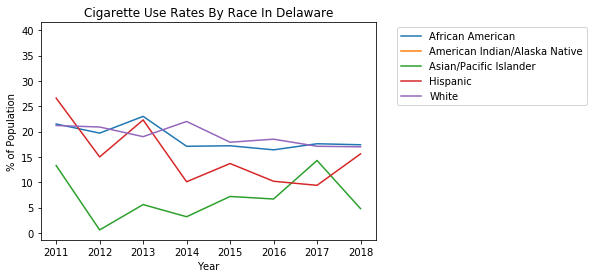

In [35]:
df[(df.Race != "All Races") & (df.TopicDesc == "Cigarette Use (Adults)") & (df.LocationDesc == "Delaware")].groupby(["YEAR", "Race"]).Data_Value.mean().reset_index().pivot(index="YEAR", columns="Race", values="Data_Value").plot(title="Cigarette Use Rates By Race In Delaware")
plt.xticks(range(2011, 2019))
plt.xlabel("% of Population")
plt.legend(loc=0)
plt.ylabel("% of Population")
plt.xlabel("Year")
plt.legend(bbox_to_anchor=(1.05, 1));

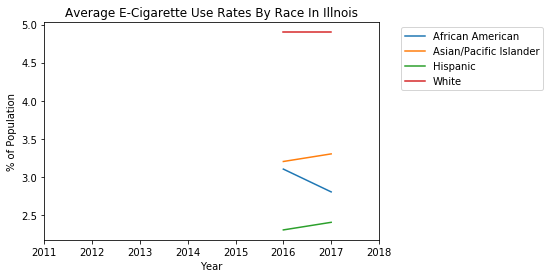

In [21]:
df[(df.Race != "All Races") & (df.TopicDesc == "E-Cigarette Use (Adults)") & (df.LocationDesc == "Illinois")].groupby(["YEAR", "Race"]).Data_Value.mean().reset_index().pivot(index="YEAR", columns="Race", values="Data_Value").plot(title="Average E-Cigarette Use Rates By Race In Illnois")
plt.xticks(range(2011, 2019))
plt.xlabel("% of Population")
plt.legend(loc=0)
plt.ylabel("% of Population")
plt.xlabel("Year")
plt.legend(bbox_to_anchor=(1.05, 1));

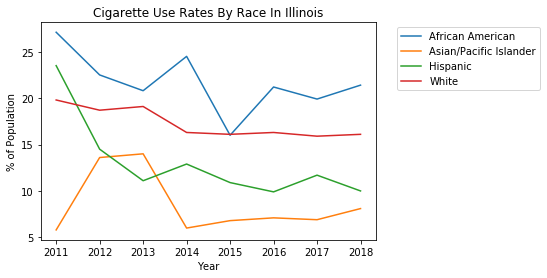

In [36]:
df[(df.Race != "All Races") & (df.TopicDesc == "Cigarette Use (Adults)") & (df.LocationDesc == "Illinois")].groupby(["YEAR", "Race"]).Data_Value.mean().reset_index().pivot(index="YEAR", columns="Race", values="Data_Value").plot(title="Cigarette Use Rates By Race In Illinois")
plt.xticks(range(2011, 2019))
plt.xlabel("% of Population")
plt.legend(loc=0)
plt.ylabel("% of Population")
plt.xlabel("Year")
plt.legend(bbox_to_anchor=(1.05, 1));

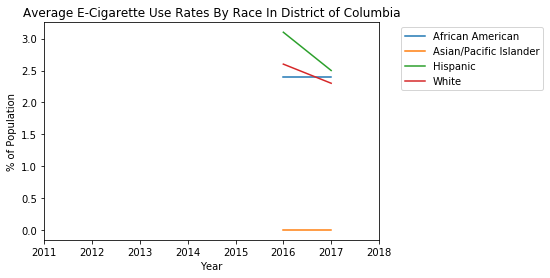

In [32]:
df[(df.Race != "All Races") & (df.TopicDesc == "E-Cigarette Use (Adults)") & (df.LocationDesc == "District of Columbia")].groupby(["YEAR", "Race"]).Data_Value.mean().reset_index().pivot(index="YEAR", columns="Race", values="Data_Value").plot(title="Average E-Cigarette Use Rates By Race In District of Columbia")
plt.xticks(range(2011, 2019))
plt.xlabel("% of Population")
plt.legend(loc=0)
plt.ylabel("% of Population")
plt.xlabel("Year")
plt.legend(bbox_to_anchor=(1.05, 1));

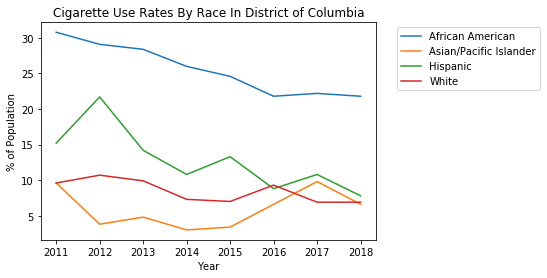

In [28]:
df[(df.Race != "All Races") & (df.TopicDesc == "Cigarette Use (Adults)") & (df.LocationDesc == "District of Columbia")].groupby(["YEAR", "Race"]).Data_Value.mean().reset_index().pivot(index="YEAR", columns="Race", values="Data_Value").plot(title="Cigarette Use Rates By Race In District of Columbia")
plt.xticks(range(2011, 2019))
plt.xlabel("% of Population")
plt.legend(loc=0)
plt.ylabel("% of Population")
plt.xlabel("Year")
plt.legend(bbox_to_anchor=(1.05, 1));